# Projeto Estatística II - Grupo 3
Grupo: Alex Moulin, Antonio Zanutto, Carolina Yumi, Gabriel Mourão, Haroldo Viana, Rafael RIbeiro e Thaís Falcão

## BRAIN STORM

- Objetivo deste projeto é lidar com um problema real e tentar resolvê-lo utilizando um modelo de regressão.
- Realizamos uma análise abrangente, explicando cada etapa e justificando cada ação escolhida.
- Incluímos gráficos e tabelas comparativas para auxiliar na visualização dos dados.

## BASE DE DADOS

A base de dados escolhida foi obtida no Kaggle e pode ser verificada <a href="https://www.kaggle.com/datasets/rubenssjr/brasilian-houses-to-rent?select=houses_to_rent_v2.csv" target="_blank">clicando aqui</a>.

A base de dados é composta pelas seguintes características de imóveis:
- Cidade do imóvel
- Área (m²) do imóvel
- Quantidade de quartos
- Quantidade de banheiros
- Quantidade de vagas de estacionamento
- Andar em que o imóvel está localizado
- Se é permitido ter animais de estimação
- Se é mobiliado ou não
- Taxa de condomínio (R$)
- Aluguel (R$)
- IPTU (R$)
- Seguro contra incêndio (R$)
- Total (R$)

## INICIANDO O PROJETO

**Carregando as bibliotecas**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Carregando a base de dados**

In [8]:
df = pd.read_csv(r'db\houses_to_rent_v2.csv')
# Verificando as primeiras linhas da base de dados
df.head()

,Cidade,Área (m2),Quartos,Banheiro,Vagas de Est.,Andar,Permitido pets,Mobiliado,Taxa de Cond. (R$),Aluguel (R$),IPTU (R$),Seguro incêndio (R$),Total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


**Definindo o problema**

Aqui começa uma etapa de reflexão. Pense em um possivel problema que você poderia resolver usando os dados que tem disponíveis, por exemplo:

- Se escolhi um conjunto de dados com informações de vinhos e os preços deles, meu problema poderia ser tentar fazer a descobrir o preço de um vinho (que ainda não saiu no mercado) com base nas caracteristicas dele.

- Fazer 2 modelos para prever: aluguel e IPTU
- 'Andar': transformar em 'casa ou apê'
- Retirar IPTU zero (considerar como isenção) para treinar o modelo de aluguel, depois prever qual seria o IPTU desses valores zerados
- Avaliar correlações entre as variáveis (ex: IPTU, área e cidade)
- Fazer tabela com métricas de erro comparando os vários modelos

## ANÁLISE E EXPLORAÇÃO DOS DADOS

**Faça uma análise detalhada do conjunto de dados escolhidos.**

- Identifique os tipos de dados de cada coluna e caso seja necessário, faça uma conversão no tipo de dado. Em muitas situações é interessante renomear as colunas.
- Verifique se existem valores nulos, e caso existam, elabore uma estrategia para lidar com eles (apagar eles, substituir com outro valor, etc.).
- Faça uma análise estatistica dos dados para determinar aqueles que provavelmente não vão contribuir durante a modelagem (anomalías e outrliers).
- Pode aplicar escalonamento nos dados, para manter todos eles na mesma escala.
- Caso tenha features do tipo categorico e queria usar elas durante a modelagem, transforme elas para um valor numerico (encoding!).

**Informações gerais sobre os dados**

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Cidade                10692 non-null  object
 1   Área (m2)             10692 non-null  int64 
 2   Quartos               10692 non-null  int64 
 3   Banheiro              10692 non-null  int64 
 4   Vagas de Est.         10692 non-null  int64 
 5   Andar                 10692 non-null  object
 6   Permitido pets        10692 non-null  object
 7   Mobiliado             10692 non-null  object
 8   Taxa de Cond. (R$)    10692 non-null  int64 
 9   Aluguel (R$)          10692 non-null  int64 
 10  IPTU (R$)             10692 non-null  int64 
 11  Seguro incêndio (R$)  10692 non-null  int64 
 12  Total (R$)            10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [43]:
print(f'O dataframe possui {df.shape[0]} registros')

O dataframe possui 10692 registros


**Removendo linhas duplicadas**

In [48]:
df = df.drop_duplicates()
print(f'O dataframe agora possui {df.shape[0]} registros')

O dataframe agora possui 10334 registros


**Verificando se existem dados faltantes**

In [51]:
qtd_faltantes = df.isnull().sum()
df_faltantes =  pd.DataFrame({'Dados faltantes': qtd_faltantes})
pd.set_option('display.max_rows', 15)
df_faltantes

,Dados faltantes
Cidade,0
Área (m2),0
Quartos,0
Banheiro,0
Vagas de Est.,0
Andar,0
Permitido pets,0
Mobiliado,0
Taxa de Cond. (R$),0
Aluguel (R$),0


**Medidas descritivas das variáveis**

In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Área (m2),10334.0,152.439423,545.875595,11.0,59.00,95.0,190.00,46335.0
Quartos,10334.0,2.539965,1.168185,1.0,2.00,3.0,3.00,13.0
Banheiro,10334.0,2.268725,1.414650,1.0,1.00,2.0,3.00,10.0
Vagas de Est.,10334.0,1.644475,1.598527,0.0,1.00,1.0,2.00,12.0
Taxa de Cond. (R$),10334.0,1091.243952,11446.092263,0.0,180.00,571.0,1286.75,1117000.0
Aluguel (R$),10334.0,3966.296013,3436.190007,450.0,1598.25,2750.0,5000.00,45000.0
IPTU (R$),10334.0,376.929263,3160.602165,0.0,41.00,130.0,389.75,313700.0
Seguro incêndio (R$),10334.0,54.264273,48.164380,3.0,21.00,37.0,70.00,677.0
Total (R$),10334.0,5488.943488,12669.110756,499.0,2116.00,3685.5,6912.00,1120000.0


**Medidas descritivas da variável alvo: Aluguel (R$)**

In [9]:
df[['Aluguel (R$)']].describe()

,Aluguel (R$)
count,10692.000000
mean,3896.247194
std,3408.545518
min,450.000000
25%,1530.000000
50%,2661.000000
75%,5000.000000
max,45000.000000


**Distribuição da variável alvo: Aluguel (R$)**

<Axes: xlabel='Aluguel (R$)', ylabel='Count'>

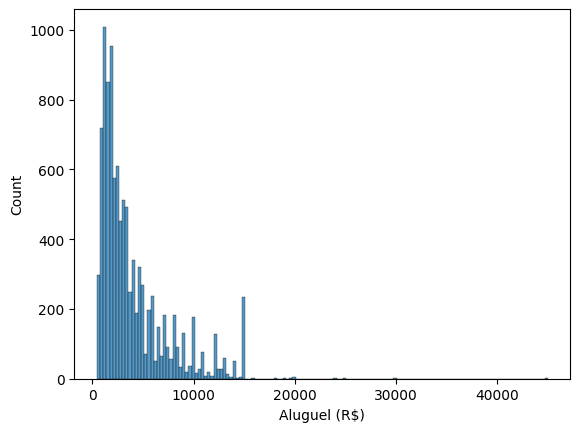

In [54]:
sns.histplot(data=df, x='Aluguel (R$)')

In [57]:
df['Aluguel (R$)'].skew()

1.8048130622058955

<Axes: xlabel='Log_aluguel', ylabel='Count'>

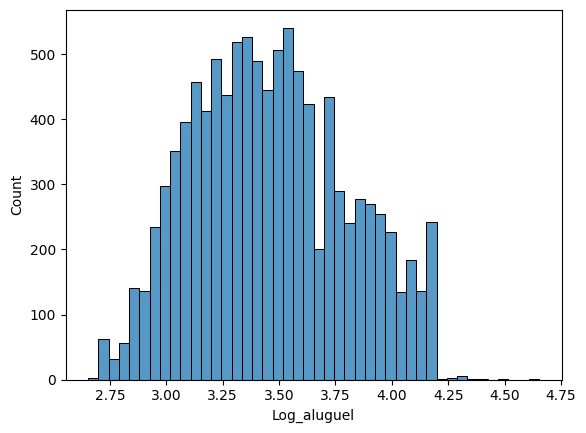

In [58]:
df['Log_aluguel'] = np.log10(df['Aluguel (R$)'])
sns.histplot(data=df, x='Log_aluguel')

In [60]:
df['Log_aluguel'].skew()

0.2181385094194639

**Tabela de correlação entre variáveis numéricas**

In [61]:
correlacao = df.corr(numeric_only=True)
correlacao

,Área (m2),Quartos,Banheiro,Vagas de Est.,Taxa de Cond. (R$),Aluguel (R$),IPTU (R$),Seguro incêndio (R$),Total (R$),Log_aluguel
Área (m2),1.000000,0.191251,0.224388,0.191421,0.009085,0.178228,0.038453,0.185652,0.066849,0.174788
Quartos,0.191251,1.000000,0.730469,0.611634,0.020466,0.536632,0.073539,0.560907,0.184519,0.587692
Banheiro,0.224388,0.730469,1.000000,0.693952,0.057297,0.665625,0.108083,0.673771,0.261833,0.691678
Vagas de Est.,0.191421,0.611634,0.693952,1.000000,0.021100,0.573997,0.097159,0.593557,0.201245,0.597841
Taxa de Cond. (R$),0.009085,0.020466,0.057297,0.021100,1.000000,0.052516,0.011267,0.042833,0.920770,0.051660
Aluguel (R$),0.178228,0.536632,0.665625,0.573997,0.052516,1.000000,0.106679,0.987203,0.349045,0.914062
IPTU (R$),0.038453,0.073539,0.108083,0.097159,0.011267,0.106679,1.000000,0.104473,0.288968,0.099432
Seguro incêndio (R$),0.185652,0.560907,0.673771,0.593557,0.042833,0.987203,0.104473,1.000000,0.336324,0.898023
Total (R$),0.066849,0.184519,0.261833,0.201245,0.920770,0.349045,0.288968,0.336324,1.000000,0.322815
Log_aluguel,0.174788,0.587692,0.691678,0.597841,0.051660,0.914062,0.099432,0.898023,0.322815,1.000000


**Heatmap da correlação das variáveis numéricas**

<Axes: >

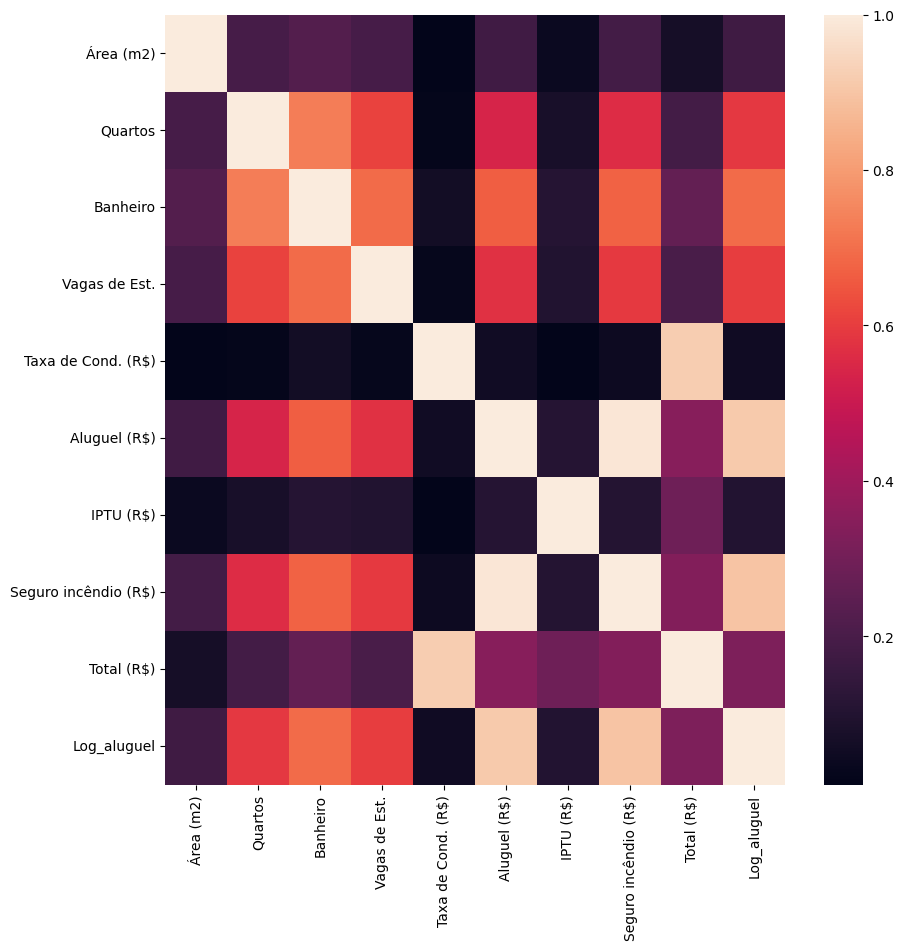

In [62]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlacao)

## MODELAGEM

#### 1. Importar a **classe do estimador que se deseja treinar** - escolher a hipótese!

- Identifique o problema com o qual está lidando (classificação ou regressão).
- Dependendo ao problema, faça escolha de qual estimador deseja usar para sua modelagem (pode escolher mais de uma para fins de teste!).

In [ ]:
# Importe aqui ...

In [ ]:
# Código aqui ...

#### 5. Use o modelo treinado para **fazer previsões** usando os **dados de teste** (ou **de validação**)

In [ ]:
# Código aqui ...

#### 6. **Avalie a performance do modelo com base nas previsões acima**

Lembre que você pode treinar e avaliar muito modelos, e no final escolher aquele que teve melhor performance respeito à metrica escolhida.

In [ ]:
# Código aqui ...